# 문제 1
- 최소비용 구하기
- https://www.acmicpc.net/problem/1916

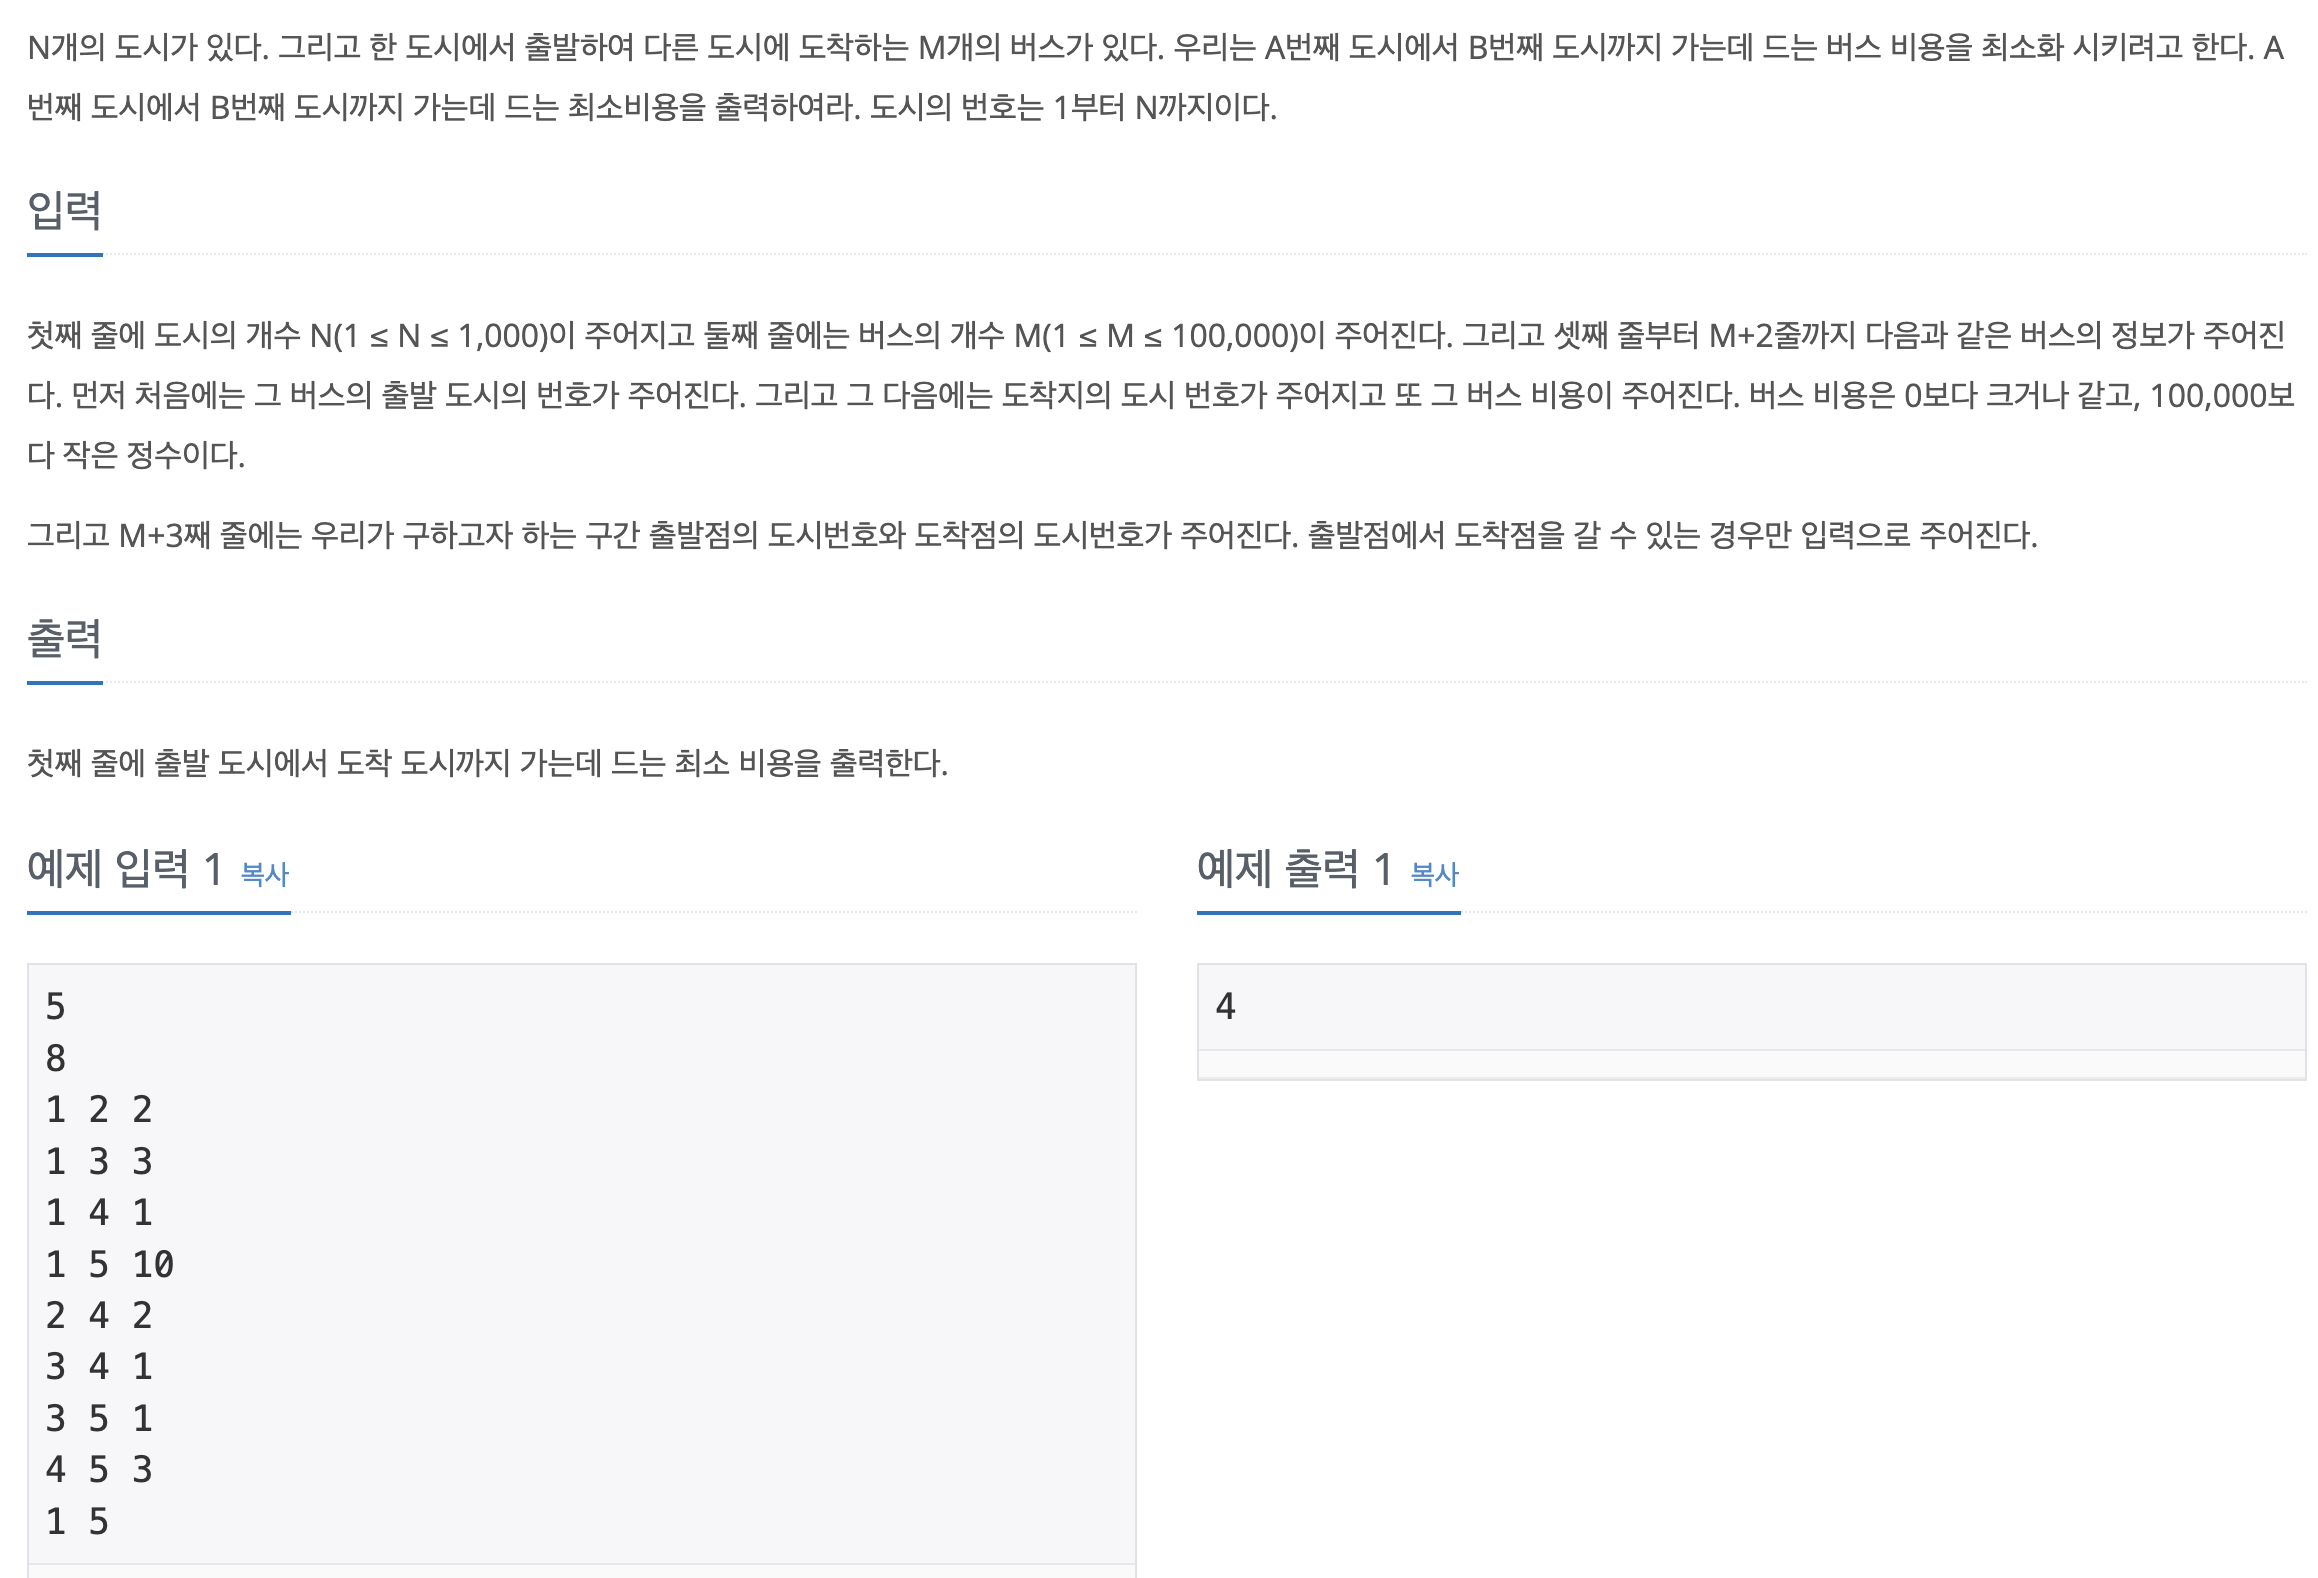

In [30]:
import sys
import heapq
input = sys.stdin.readline

n = int(input())
m = int(input())

graph = [[] for i in range(n+1)]
visited = [False] * (n+1)
dist = [100000000] * (n+1)         # 문제에서는 비용이 100,000까지라고 하여서 그 값으로 설정했더니, 60%정도에서 통과 x
                                   # 값을 늘리면 통과 -> 왜??
for _ in range(m):
    a,b,c = map(int, input().split())
    graph[a].append((b,c))

start, end = map(int, input().split())

# # 방문하지 않은 노드 중, 최단거리 노드 찾기  (틀렸음)
# def get_smallest_node():
#     min_value = 100000
#     index = 0  # 최단거리의 노드 인덱스를 저장할 변수
#     for i in range(1, n+1):
#         if dist[i] < min_value and not visited[i]:
#             min_value = dist[i]
#             index = i
#     return index

# def dijkstra(start):
#     # 시작지점에 대한 변수 초기화
#     dist[start] = 0 # 자기 자신까지의 경로 = 0
#     visited[start] = True
#     for j in graph[start]:
#         dist[j[0]] = j[1]
    
#     # 시작지점을 제외한 n-1개의 노드에 대한 변수 초기화
#     while sum(visited) <= (n-1):
#         now = get_smallest_node()
#         visited[now] = True
        
#         for j in graph[now]:
#             cost = dist[now] + j[1] # 거쳐가는 경로의 거리 갱신
            
#             # 만약 거쳐가는 경로가 저장된 거리보다 짧다면, 최신화
#             if cost < dist[j[0]]:
#                 dist[j[0]] = cost

# 다익스트라 알고리즘
def dijkstra(start):
    q = []
    heapq.heappush(q, (0, start))  # 거리, 노드를 삽입
    dist[start] = 0                # 자기 자신과의 거리 = 0
    while q:
        d, now = heapq.heappop(q)
        if dist[now] < d:          # 현재 노드까지의 최소 거리가 만약 현재 비용보다 작다면 최신화 해줄 필요가 없다
            continue
            
        for j in graph[now]:       
            cost = d + j[1]        # 경유하는 경로의 비용 갱신
            if cost < dist[j[0]]:  # 경유하는 경로가 저장된 비용보다 작다면, 최신화
                dist[j[0]] = cost
                heapq.heappush(q, (cost, j[0]))

dijkstra(start)

print(dist[end])

5
8
1 2 2
1 3 3
1 4 1
1 5 10
2 4 2
3 4 1
3 5 1
4 5 3
1 5
4


In [35]:
graph

[[],
 [(2, 2), (3, 3), (4, 1), (5, 10)],
 [(4, 2)],
 [(4, 1), (5, 1)],
 [(5, 3)],
 []]

In [36]:
visited

[False, True, True, True, True, True]

In [37]:
dist

[100000, 0, 2, 3, 1, 4]

# 문제 2
- 경로 찾기
- https://www.acmicpc.net/problem/11403

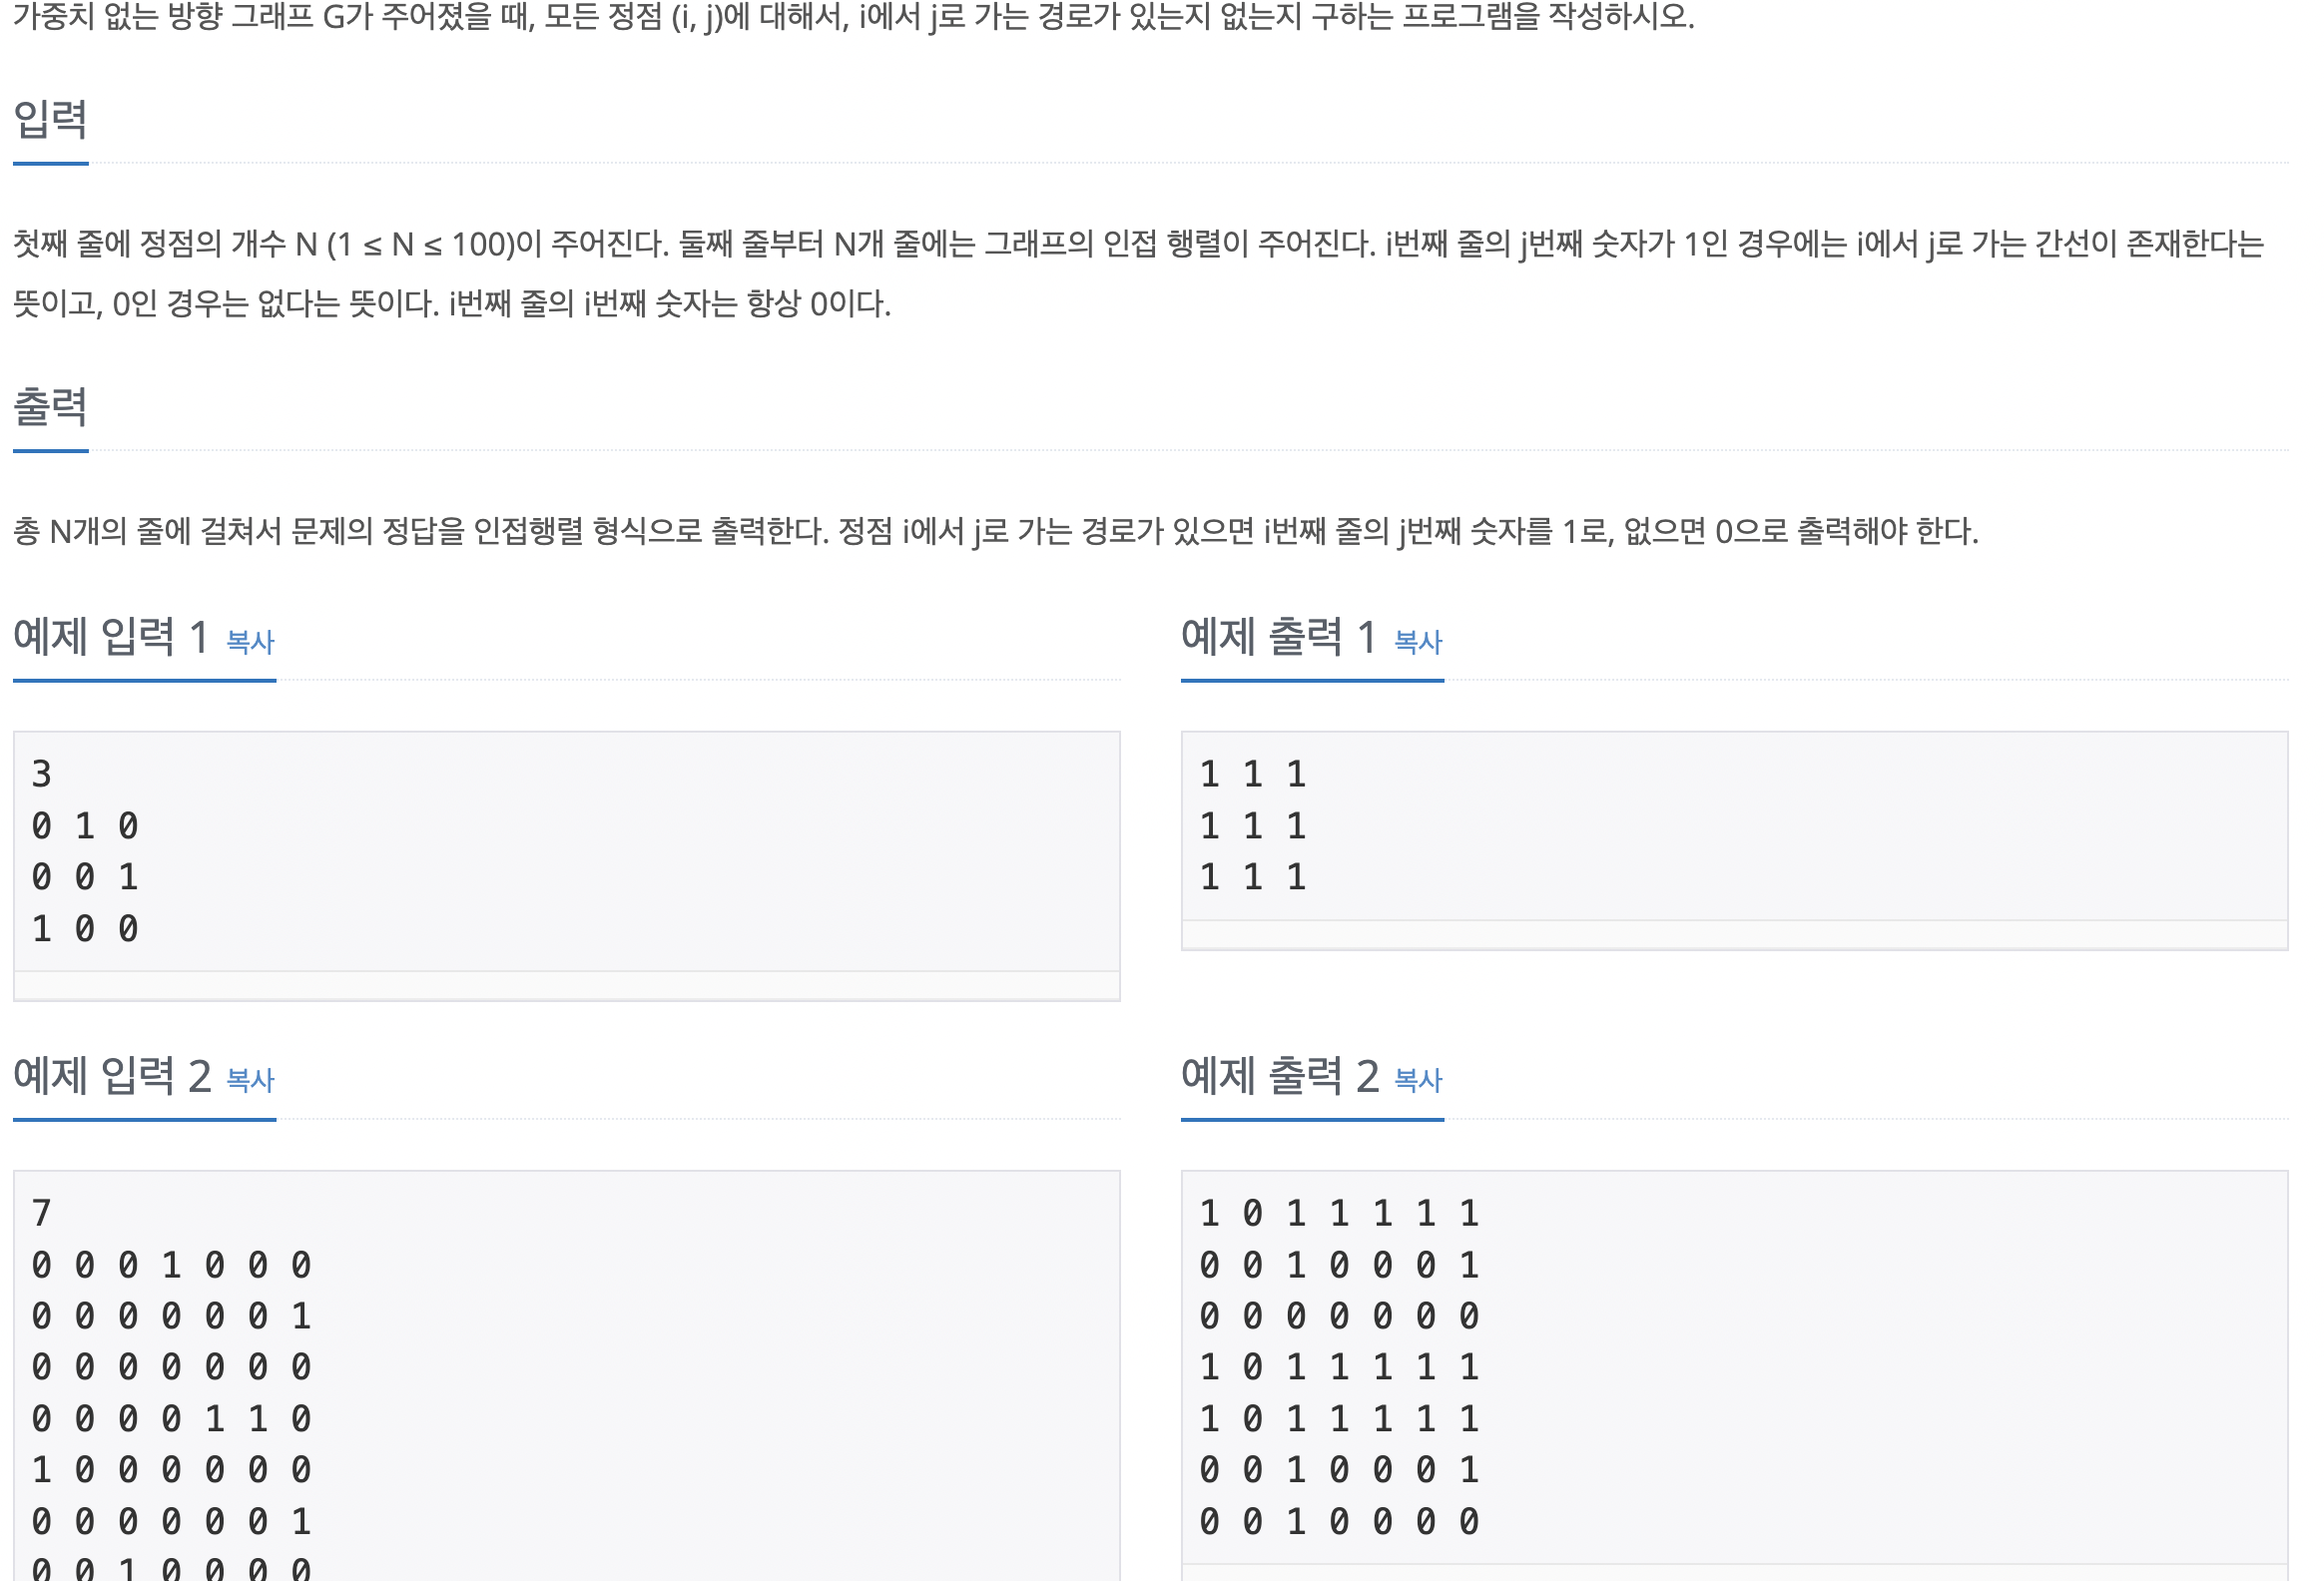

## BFS 풀이

In [45]:
n = int(input())
graph = []
for _ in range(n):
    graph.append(list(map(int, input().split())))

def bfs(i, graph, n):
    visit = [0] * n
    q = [i]
    
    while q:
        index = q.pop(0)
        for i,v in enumerate(graph[index]):
            if visit[i] == 0 and v == 1:
                visit[i] = 1
                q.append(i)
    return visit

for i in range(n):
    print(*bfs(i,graph,n))

1 1 1
1 1 1
1 1 1


## 플로이드 워셜 방법

- 이번 문제는 문제 그대로 가중치가 없는 방향 그래프에서 경로가 있는지 없는지 구하는 프로그램을 작성해야한다. 플로이드 와샬 알고리즘을 이용하면 쉽게 구할 수 있다. 시작점(i)부터 거치는 점(k)을 거쳐 도착 점(j)으로 가는 길이 있다면 [i][j]는 1로 바꿔주면 된다.

- https://velog.io/@hamfan524/%EB%B0%B1%EC%A4%80-11403%EB%B2%88-Python-%ED%8C%8C%EC%9D%B4%EC%8D%AC-Floyd-Warshall

In [ ]:
import sys

input = sys.stdin.readline
inf = sys.maxsize

n = int(input())
graph = []
for _ in range(n):
    graph.append(list(map(int, input().split())))

for k in range(n):
    for i in range(n):
        for j in range(n):
            if graph[i][k] and graph[k][j]:
                graph[i][j] = 1

for i in range(n):
    print(*graph[i])

# 문제 3
- 파티
- https://www.acmicpc.net/problem/1238

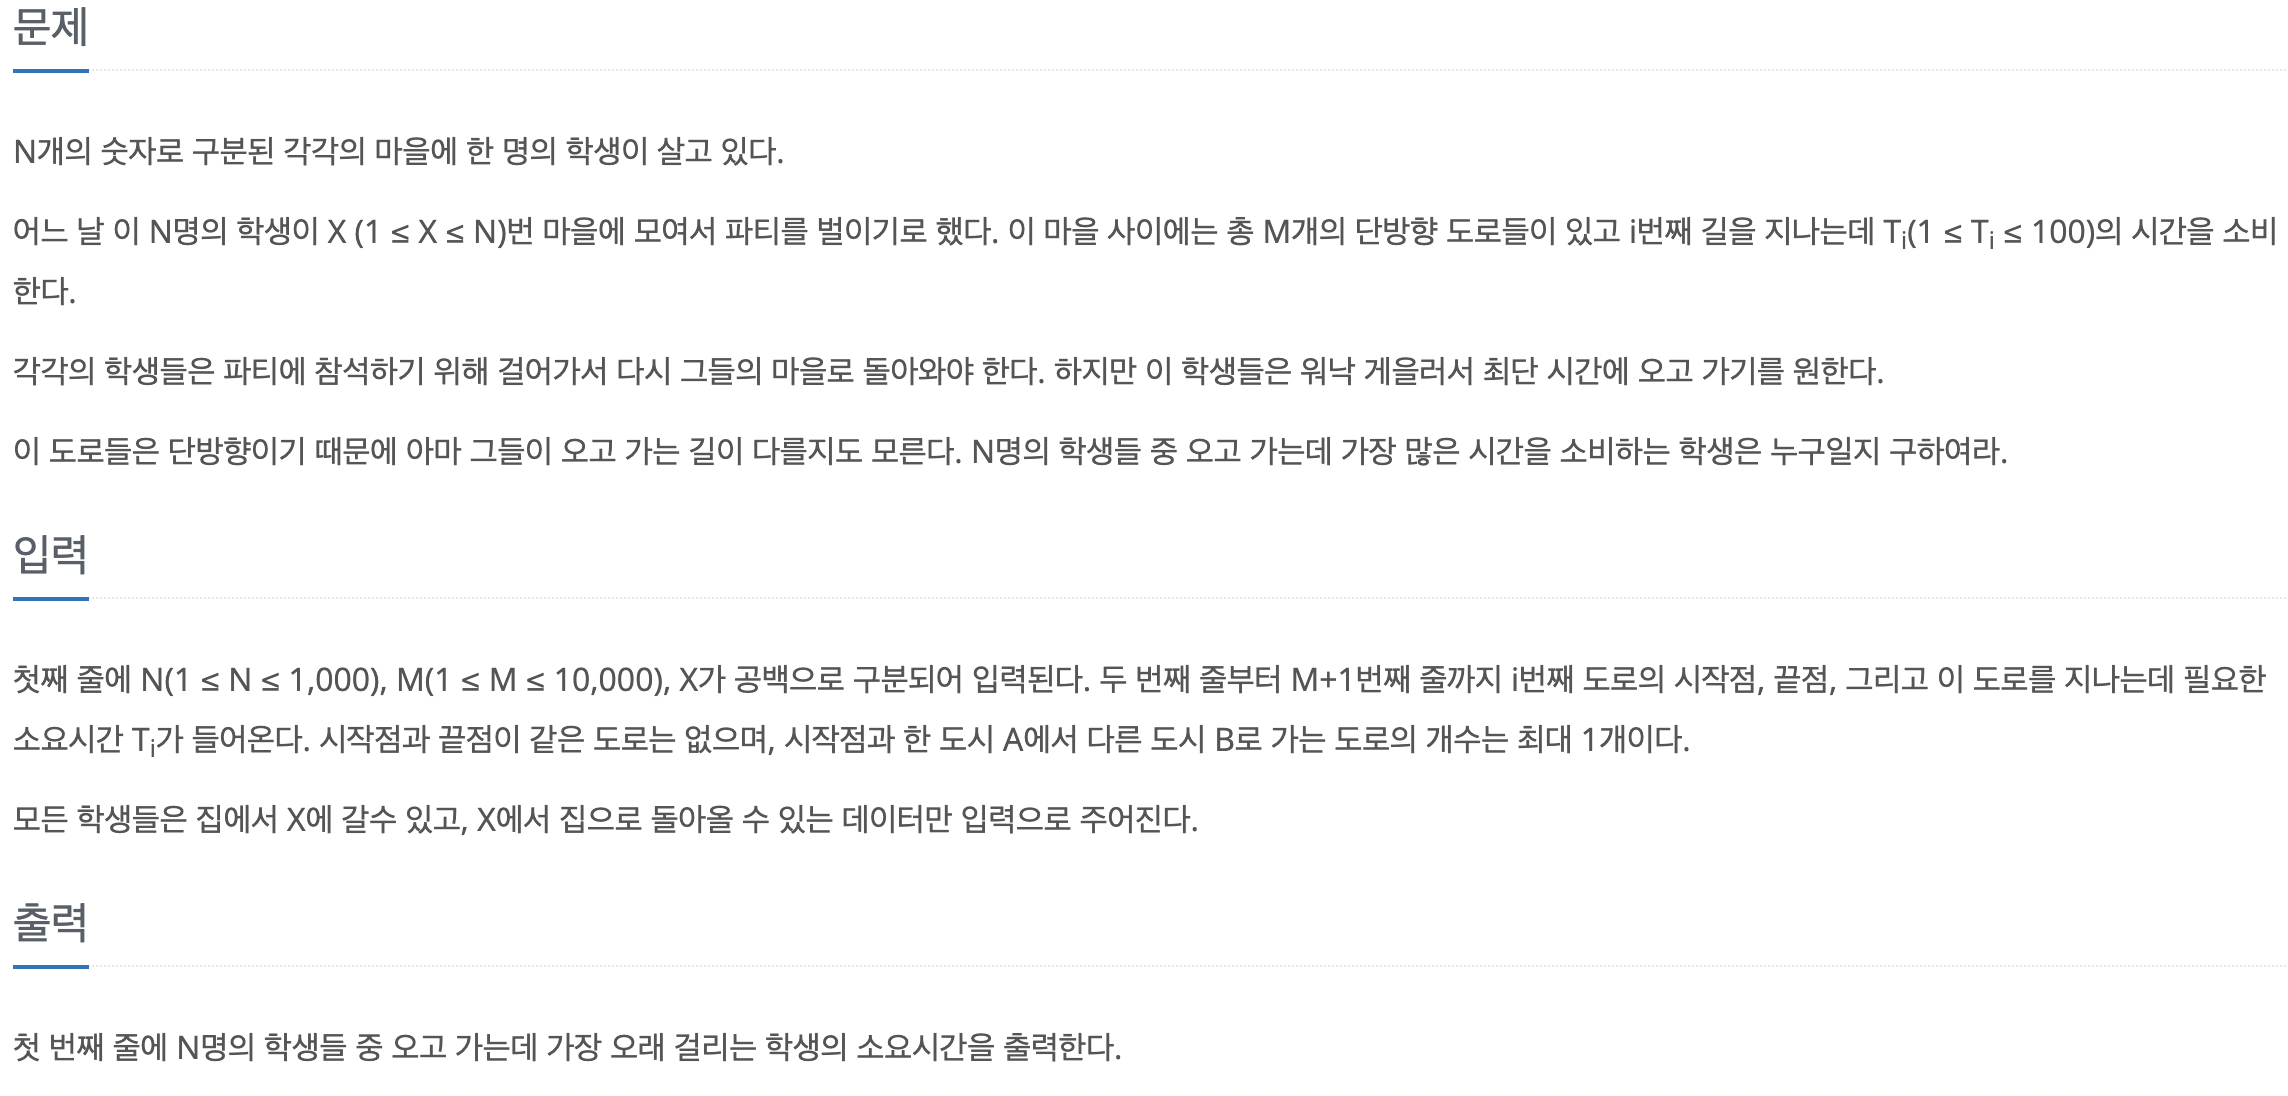

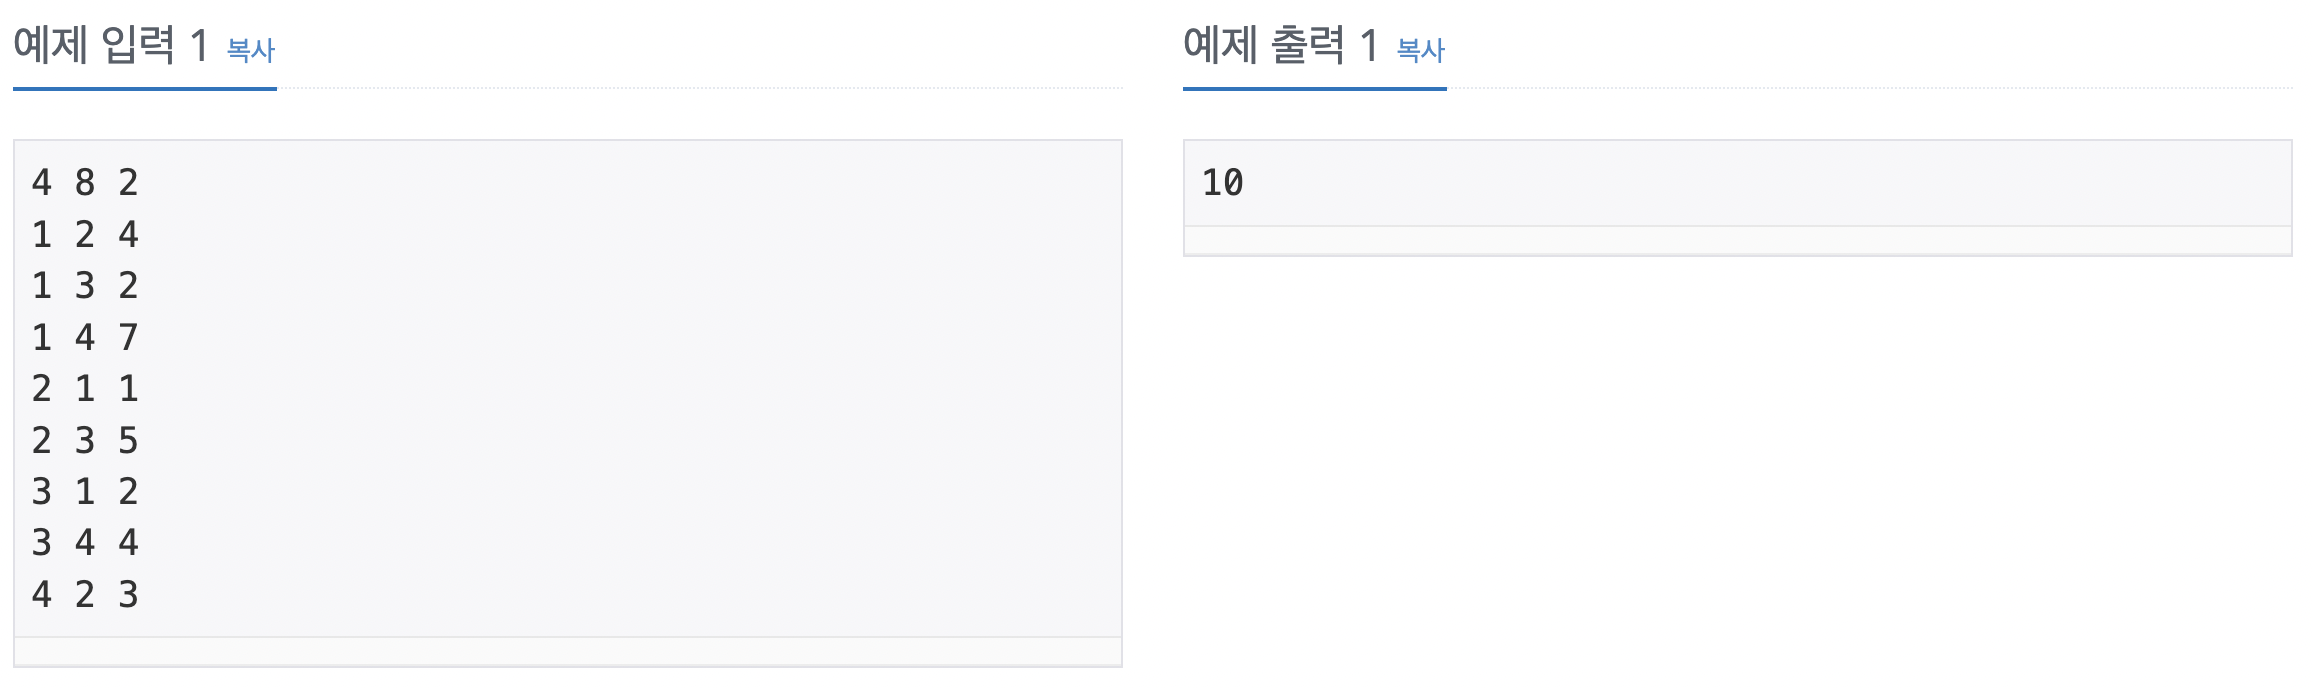

In [74]:
import sys
import heapq
input = sys.stdin.readline

n, m, x = map(int, input().split())

graph = [[] for i in range(n+1)]

for _ in range(m):
    a,b,c = map(int, input().split())
    graph[a].append((b,c))

# 다익스트라 알고리즘
def dijkstra(start):
    # 변수 초기화   
    visited = [False] * (n+1) 
    dist = [100000000] * (n+1)         

    q = []
    heapq.heappush(q, (0, start))  # 거리, 노드를 삽입
    dist[start] = 0                # 자기 자신과의 거리 = 0
    while q:
        d, now = heapq.heappop(q)
        if dist[now] < d:          # 현재 노드까지의 최소 거리가 만약 현재 비용보다 작다면 최신화 해줄 필요가 없다
            continue
            
        for j in graph[now]:       
            cost = d + j[1]        # 경유하는 경로의 비용 갱신
            if cost < dist[j[0]]:  # 경유하는 경로가 저장된 비용보다 작다면, 최신화
                dist[j[0]] = cost
                heapq.heappush(q, (cost, j[0]))
    
    return dist

ans = []
for i in range(1,n+1):
    ans.append(dijkstra(i)[x] + dijkstra(x)[i])
print(max(ans))

In [62]:
graph

[[], [(2, 4), (3, 2), (4, 7)], [(1, 1), (3, 5)], [(1, 2), (4, 4)], [(2, 3)]]

In [88]:
ans = []
for i in range(1,n+1):
    print(dijkstra(i)[x], dijkstra(x)[i])
    ans.append(dijkstra(i)[x] + dijkstra(x)[i])
ans

4 1
0 0
6 3
3 7


[5, 0, 9, 10]